# 在napari中可视化区域属性
在使用napari时，在区域之上以颜色可视化区域的定量测量是一项常见任务。napari插件[napari-skimage-regionprops](https://github.com/haesleinhuepf/napari-skimage-regionprops)为绘制这种参数图像提供了一些便利。

另请参阅
* [参数图像](data_visualization.parametric_maps)

In [1]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops_table
import napari
from napari_skimage_regionprops import visualize_measurement_on_labels, add_table

我们首先加载一个图像并在napari中可视化它。

In [2]:
image = imread('../../data/blobs.tif')

In [3]:
# 创建一个空的查看器
viewer = napari.Viewer()

/Users/haase/opt/anaconda3/envs/bio_39/lib/python3.9/site-packages/napari_tools_menu/__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


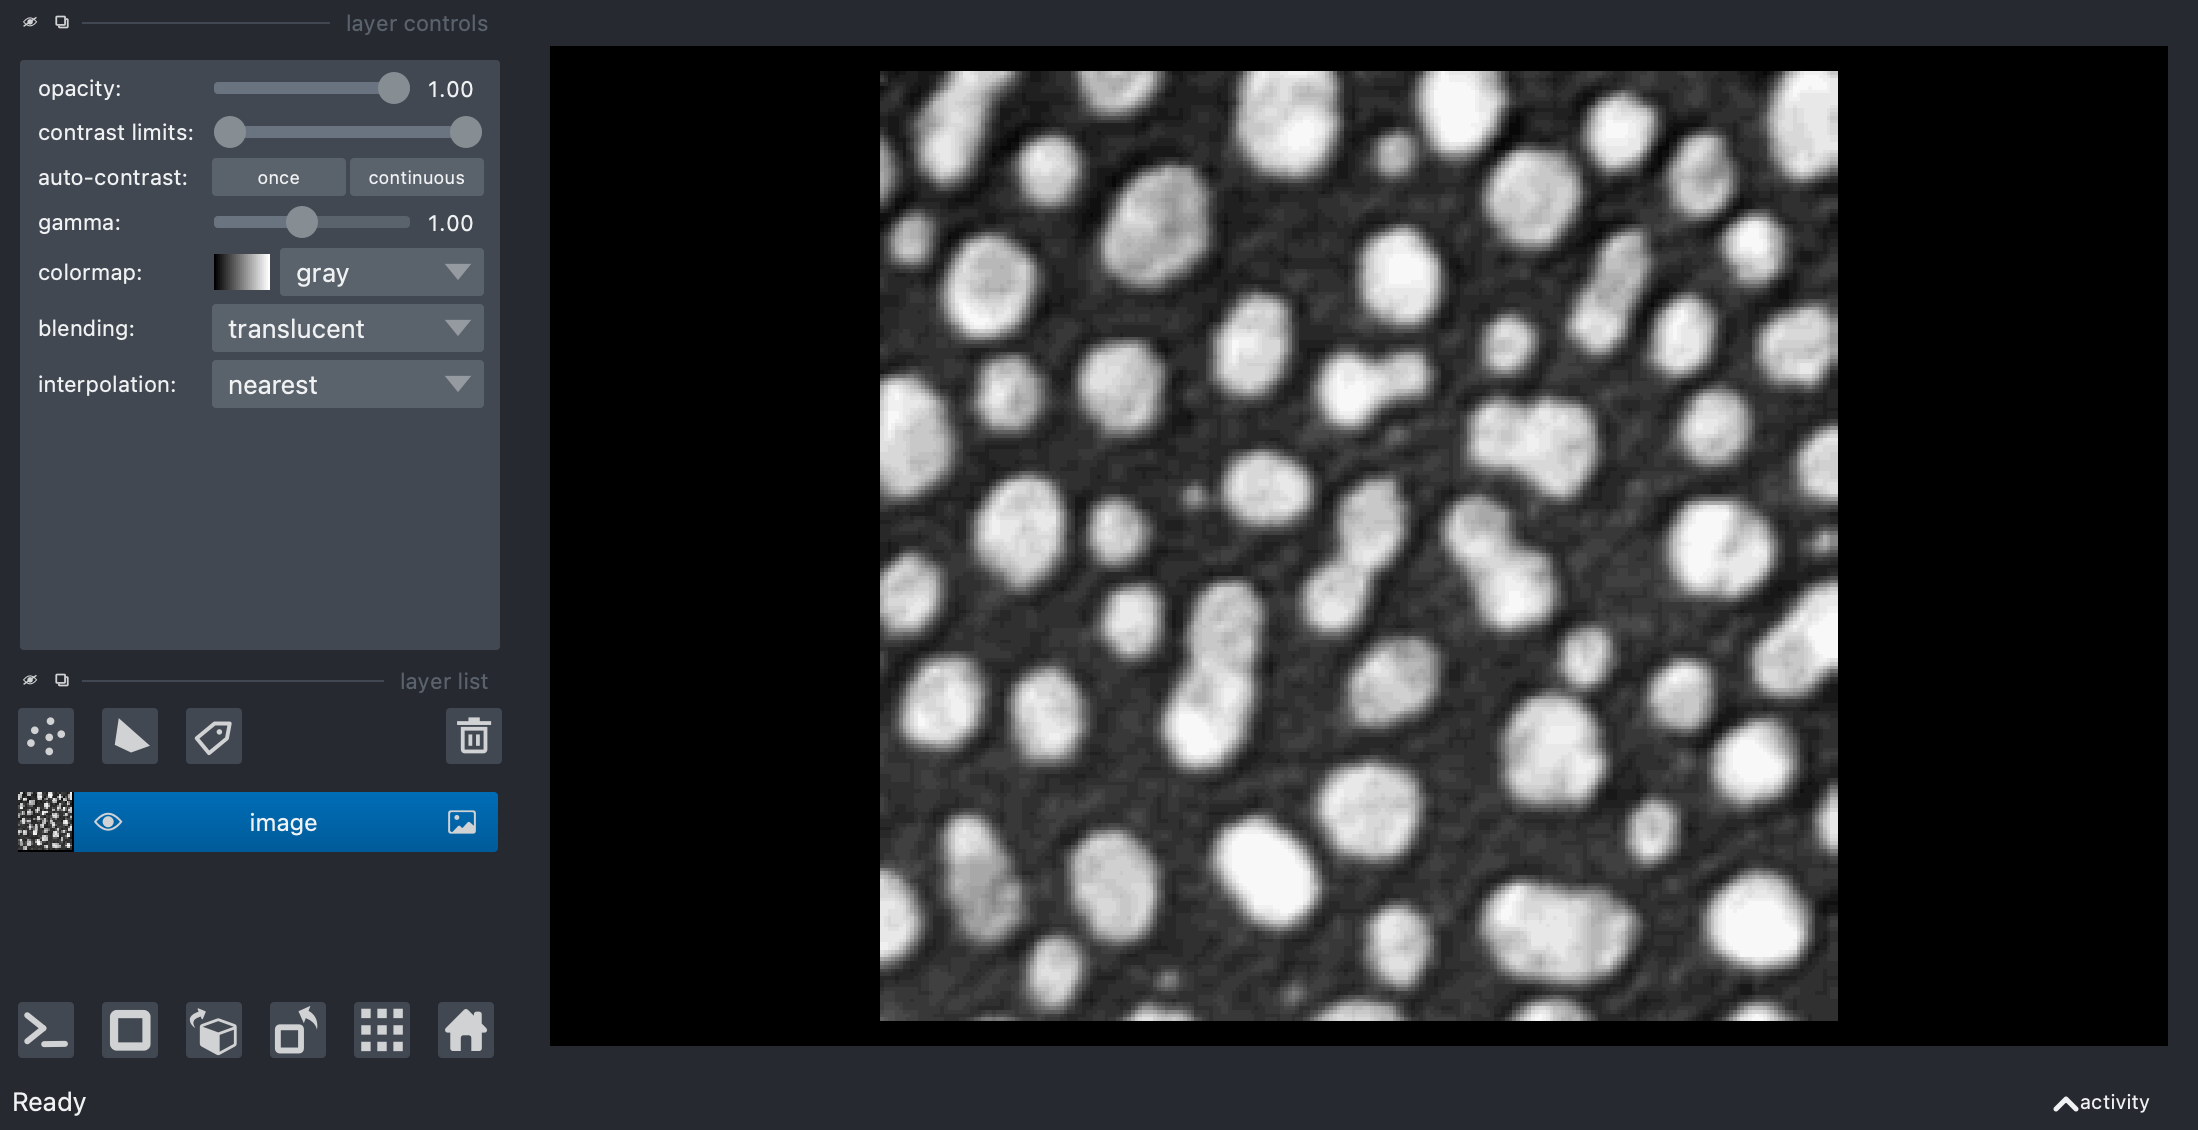

In [4]:
# 添加一个包含图像的新图层
viewer.add_image(image)

napari.utils.nbscreenshot(viewer)

接下来，我们对图像中的斑点进行分割并创建一个标签图像。

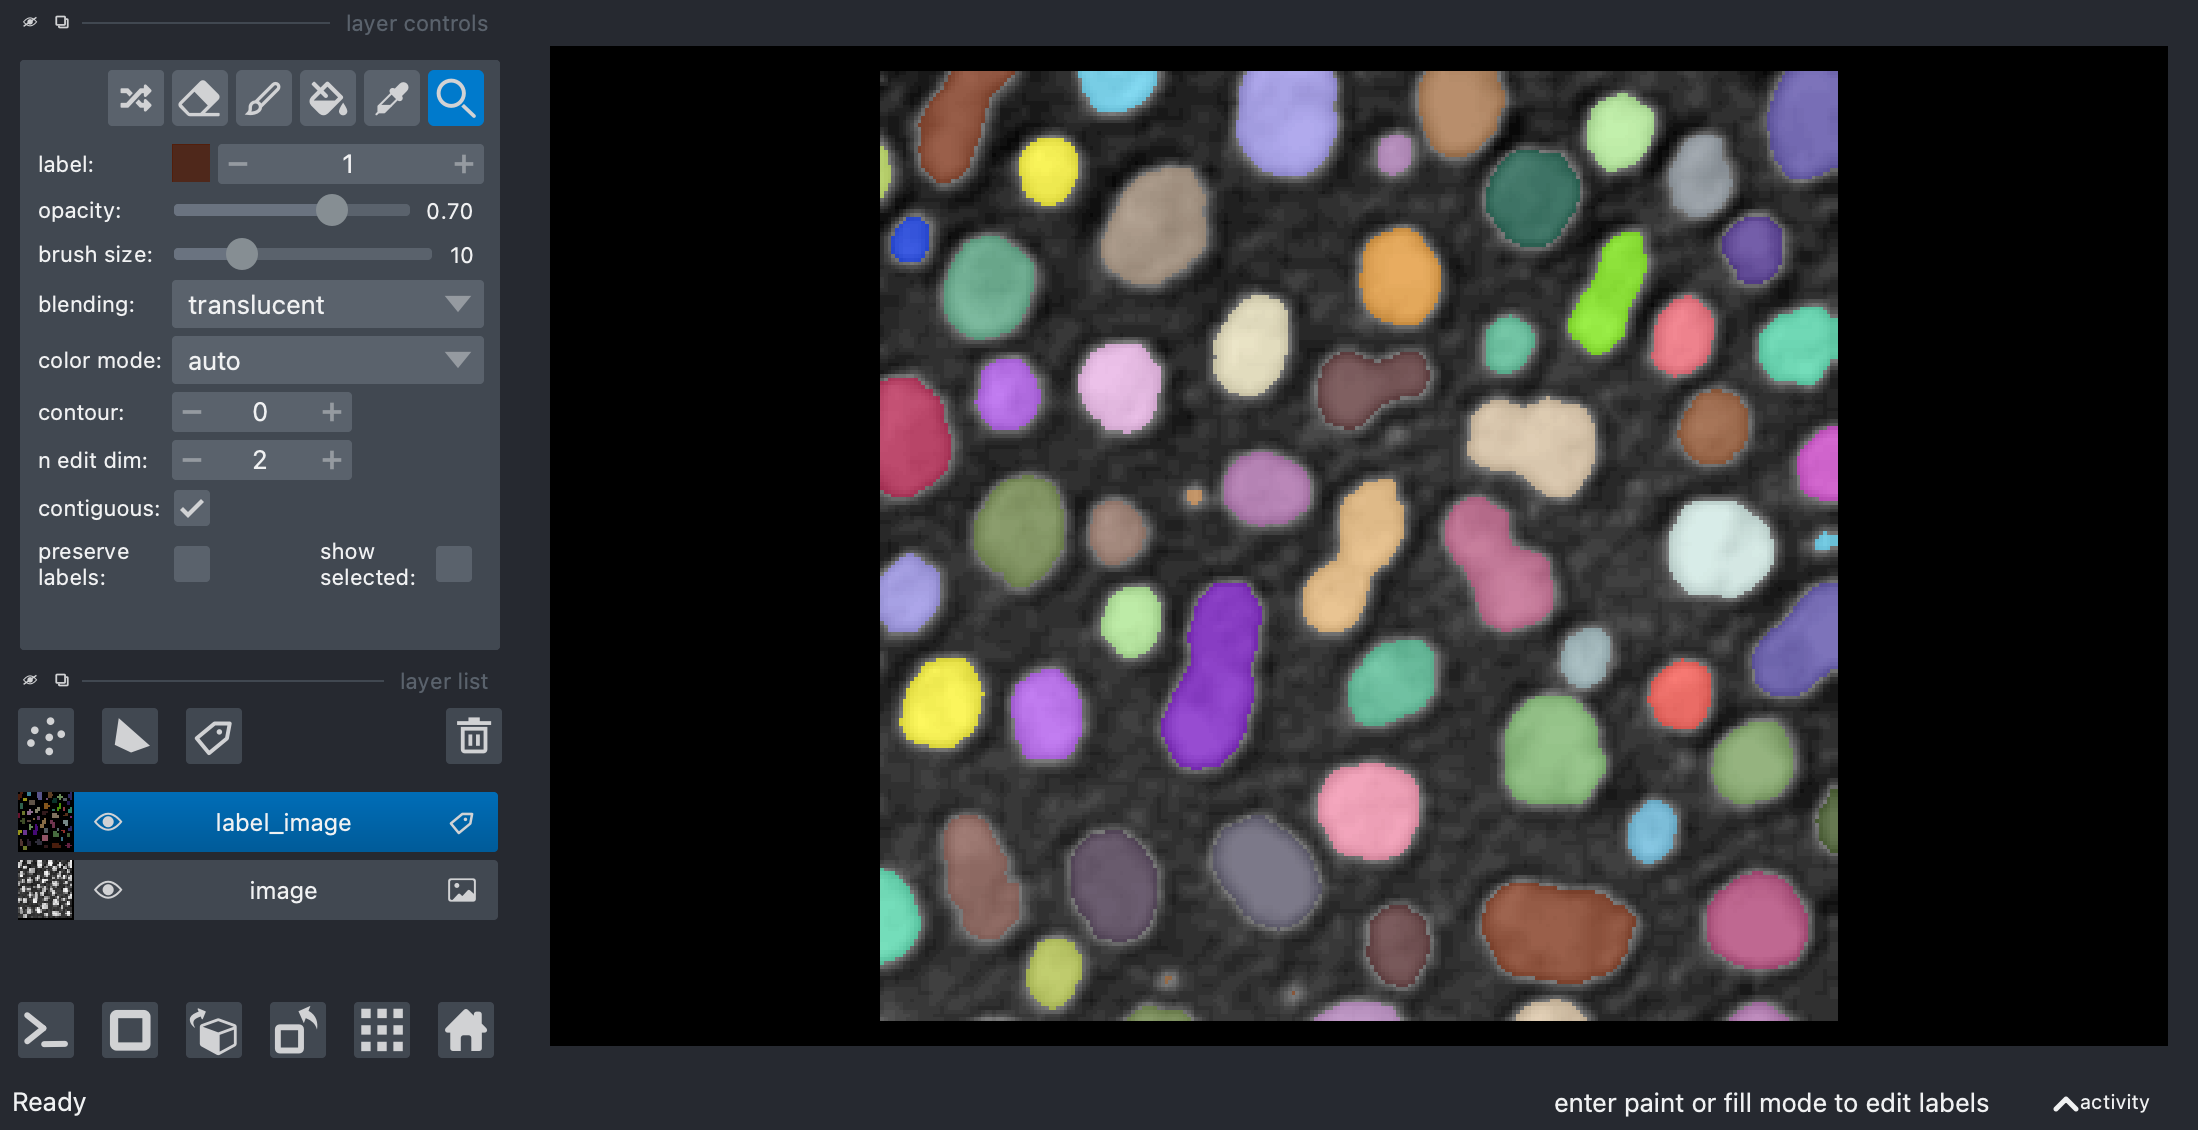

In [5]:
# 分割和标记斑点
threshold = threshold_otsu(image)
binary_image = image > threshold
label_image = label(binary_image)

# 将标签添加到查看器
label_layer = viewer.add_labels(label_image)

napari.utils.nbscreenshot(viewer)

## 定量测量
现在我们从标签图像中提取定量测量，例如通过测量标记对象的`面积`。为此，我们使用scikit-image的[`regionprops_table`函数](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table)。我们将这些统计测量保存在标签图层的`properties`中，以便napari和napari插件可以对数据进行后处理。

In [6]:
# 测量区域属性
statistics = regionprops_table(label_image, properties=['area'])

# 将属性保存在标签图层中以供后续使用
label_layer.properties = statistics

然后我们使用可脚本化的napari插件[napari-skimage-regionprops](https://github.com/haesleinhuepf/napari-skimage-regionprops)将测量结果可视化为`参数图像`，并将该图像也添加到napari查看器中。

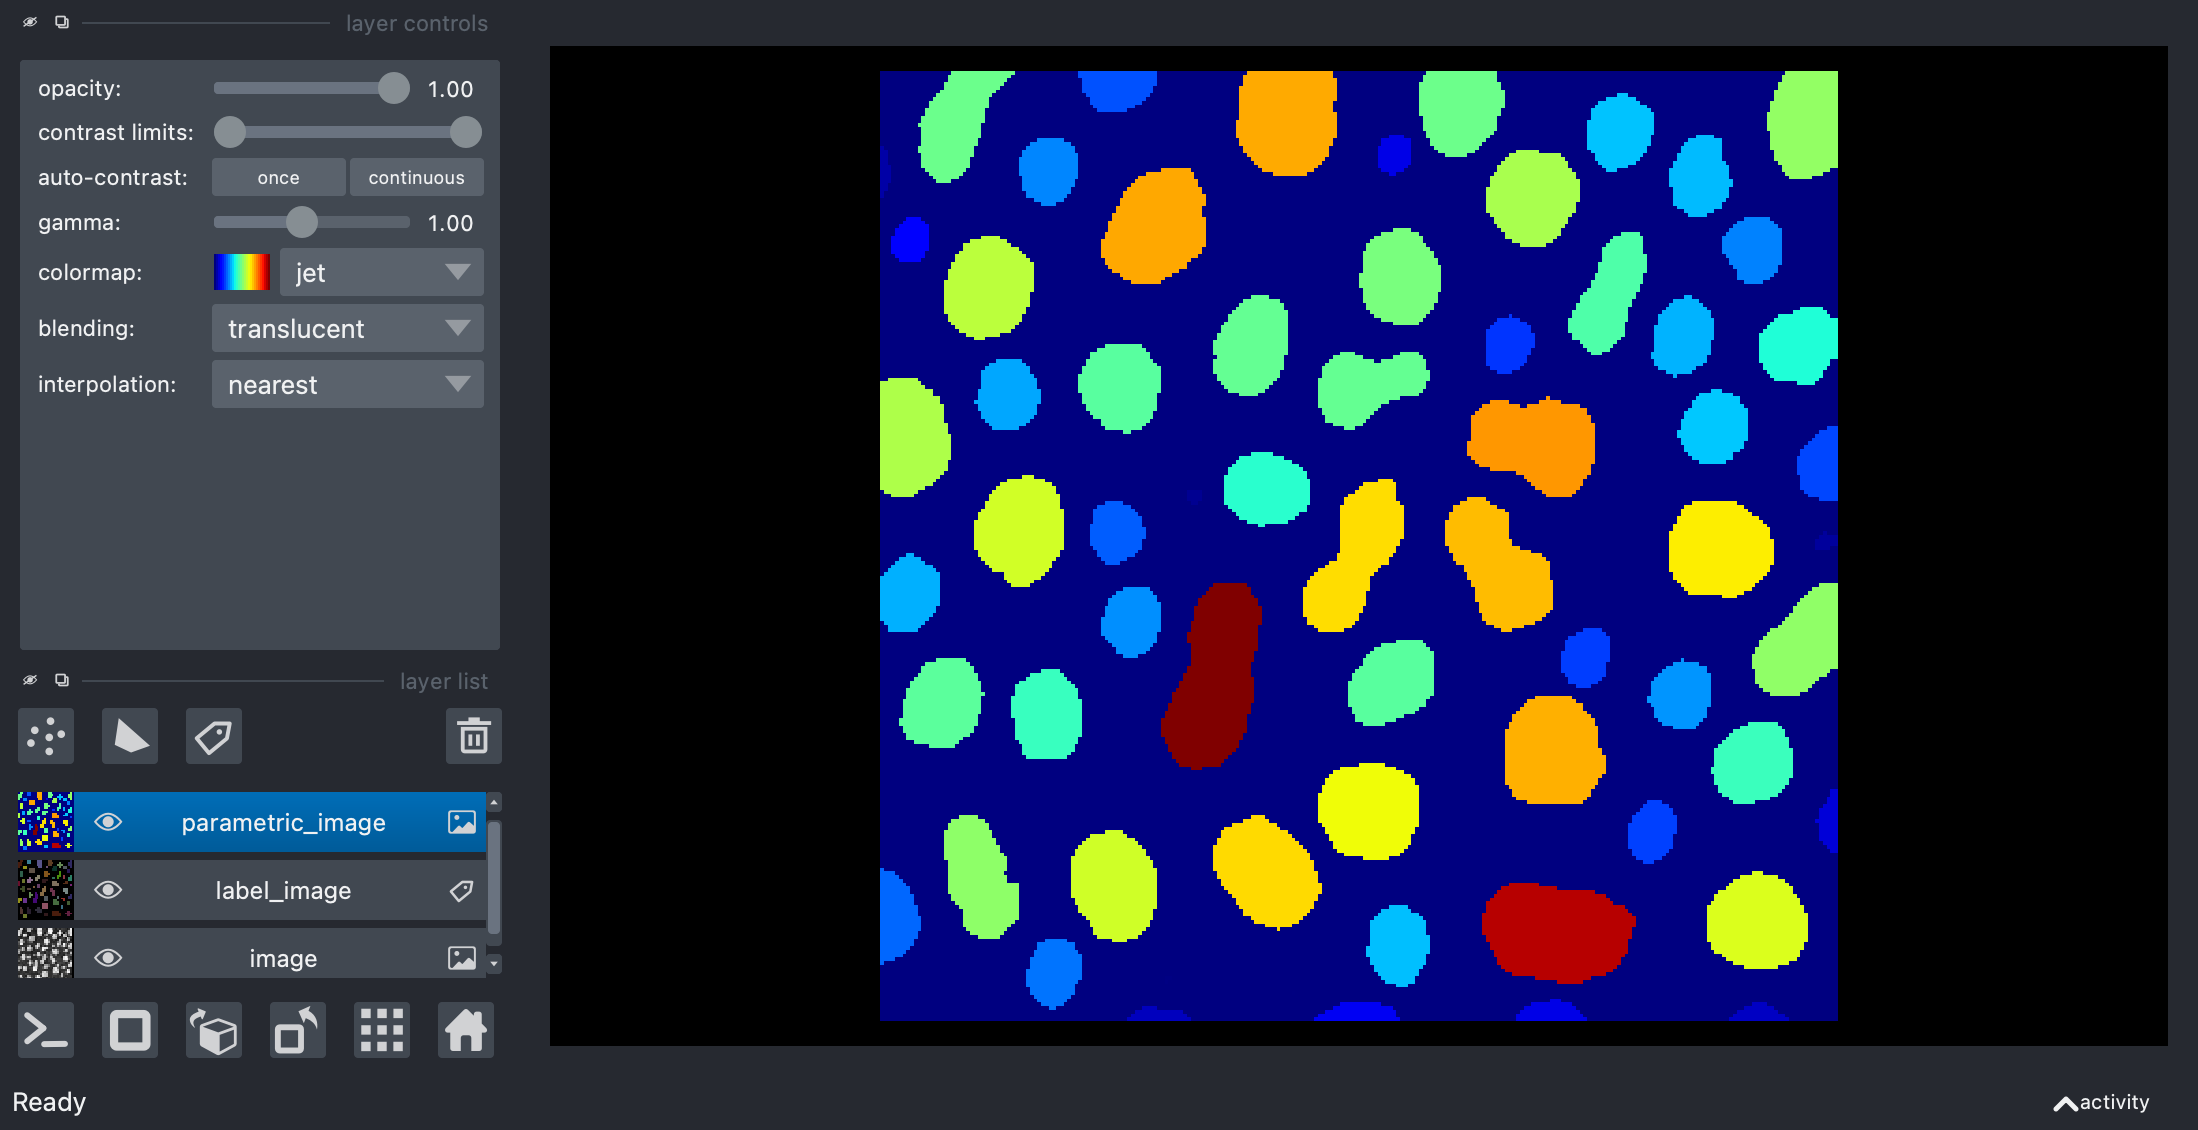

In [7]:
parametric_image = visualize_measurement_on_labels(label_layer, 'area')

viewer.add_image(parametric_image, colormap='jet')

napari.utils.nbscreenshot(viewer)

我们还可以使用同一napari插件的`add_table`函数将测量结果可视化为表格。

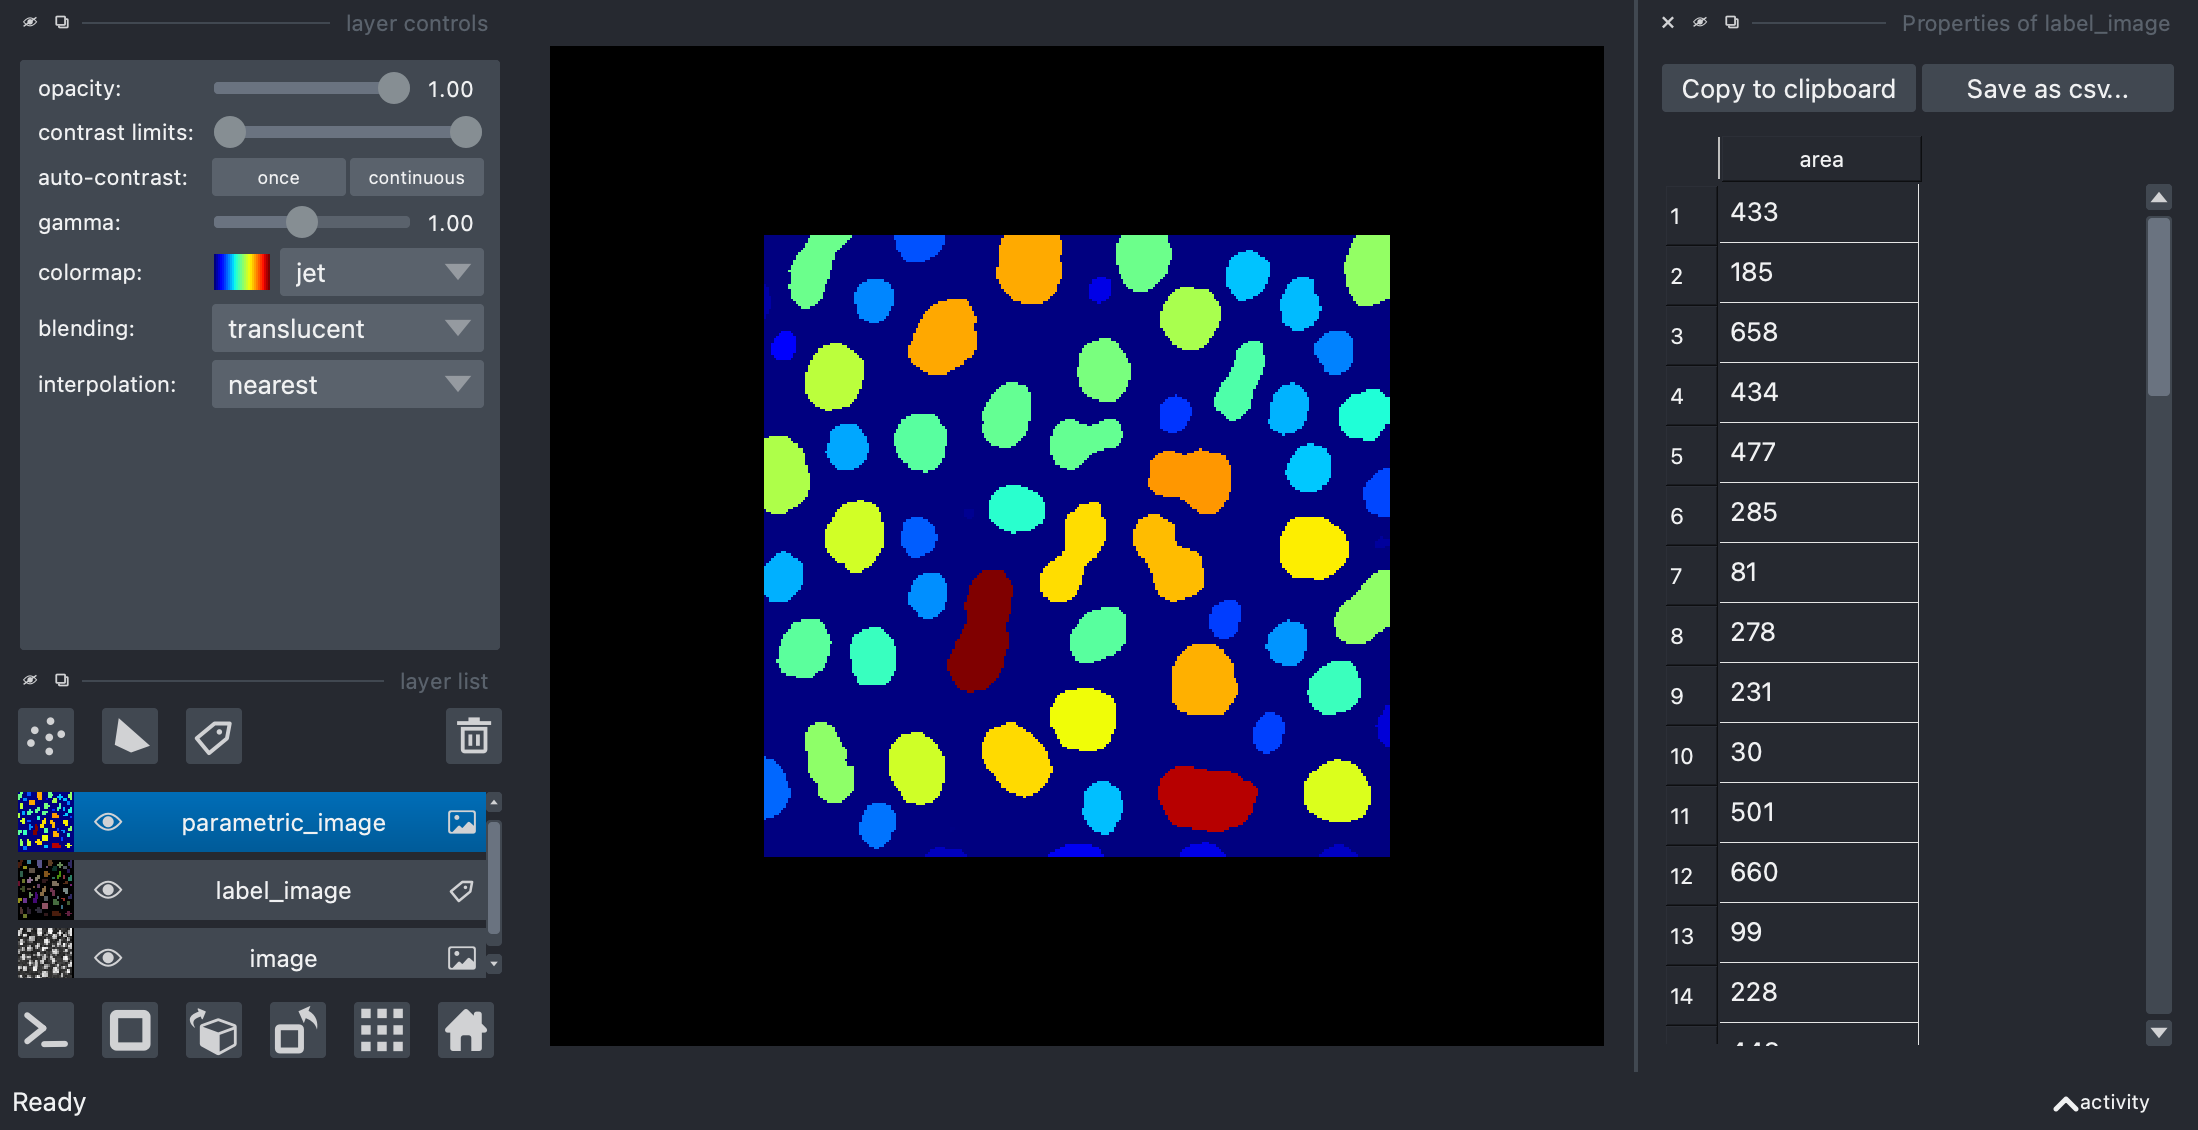

In [8]:
add_table(label_layer, viewer)

napari.utils.nbscreenshot(viewer)

## 练习

测量对象的长宽比并以颜色可视化这些值。